In [239]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [240]:
!rm -rf ./out
!mkdir ./out

In [241]:
cur_dir = %pwd

In [242]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [243]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [244]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [245]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [246]:
df = df.sort_index()

In [247]:
df.to_csv("test_res.csv")

In [248]:
df = df.iloc[:, -5:]

In [249]:
df.describe()

,2023-12-23T11:13:22.721985,2023-12-23T13:46:11.587411,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.999009e+05,2.109494e+07,2.370969e+07,2.571228e+07,4.375213e+07
std,3.329987e+06,1.815398e+08,1.833638e+08,1.999032e+08,3.330979e+08
min,1.787000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.491000e+03
25%,1.627975e+04,1.317625e+04,2.771825e+04,2.726175e+04,2.624800e+04
50%,4.829400e+04,6.039150e+04,1.300240e+05,1.363590e+05,1.740755e+05
75%,1.844292e+05,4.794680e+05,9.573105e+05,1.020852e+06,1.218528e+06
max,6.469908e+07,3.359002e+09,3.359002e+09,3.359002e+09,5.358368e+09


In [250]:
df.iloc[:, -1].mean()

43752128.666

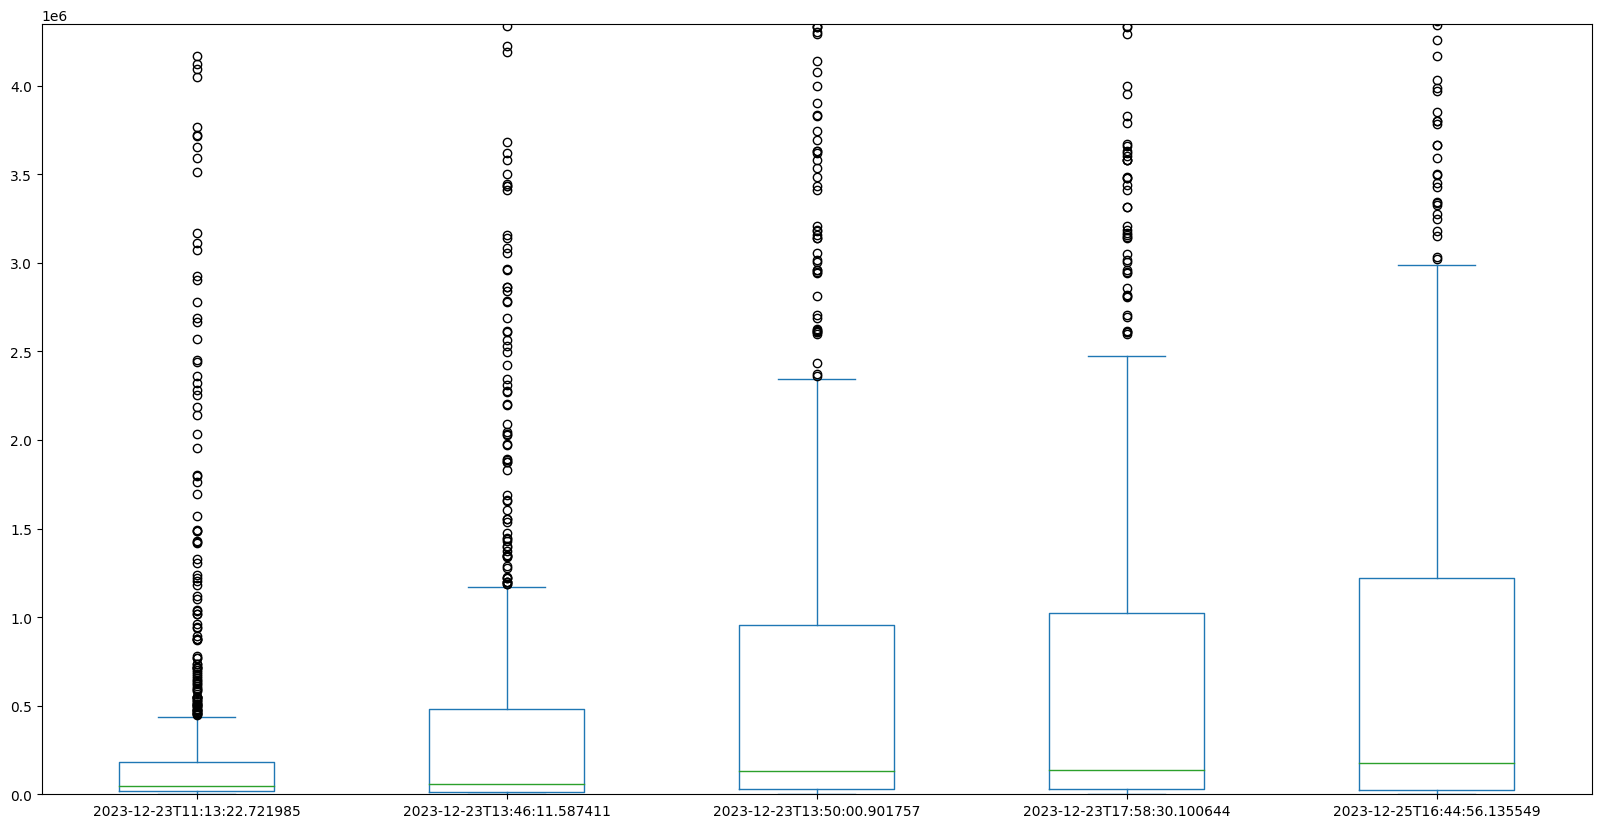

In [251]:
df.plot(kind="box", figsize=(20, 10))
plt.ylim(0, df.quantile(0.85).max())
plt.show()

In [252]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-23T11:13:22.721985,2023-12-23T13:46:11.587411,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549
0369.txt,44149734,3359001574,3359001574,3359001574,5358368249
0759.txt,5335570,2775656978,2775656978,2775656978,4883099218
0684.txt,9273191,271414119,509440871,509440871,4307432005
0935.txt,5318499,1404644707,1404644707,2337570899,3084933804
0228.txt,640527,168475279,168475279,168475279,2777881023
...,...,...,...,...,...
0419.txt,2717,2139,2967,7167,2545
0141.txt,2263,2263,2263,2032,2010
0317.txt,3064,5066,4506,4506,1976
0709.txt,2135,1173,3625,3619,1515
